# Notebook started for Fun to learn a little bit of data science with python
# Author : Fabio Sona
# Date: 11/05/2020
# Location: Segrate - Milan

In [4]:
# import pandas for handling data frames
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt

In [5]:
# Read data per province from Github repository of Protezione Civile
df=pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",sep=',')

In [6]:
# Clean up dataset 
# take out wrong data
df=df[df.denominazione_provincia.str.contains('In fase di definizione/aggiornamento')==False]
# transform timestamp into datetime
df['data']=pd.to_datetime(df['data'])
#Get the date into str of teh last update
lastday=df['data'].iloc[len(df['data'])-1]
lastday=lastday.to_pydatetime()
lastday=lastday.strftime('%d/%m/%Y')


In [7]:
# Setting criteria to extact subdata frame
# define a string with the target region I want the data per province plotted , can be any of the unique 'denominazione_regione'
regtarget='Lombardia'
# extract (and show) the unique list of provinces in the target region
provincie=df[df.denominazione_regione.str.contains(regtarget)].denominazione_provincia.unique()
provincie

array(['Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi',
       'Mantova', 'Milano', 'Monza e della Brianza', 'Pavia', 'Sondrio',
       'Varese'], dtype=object)

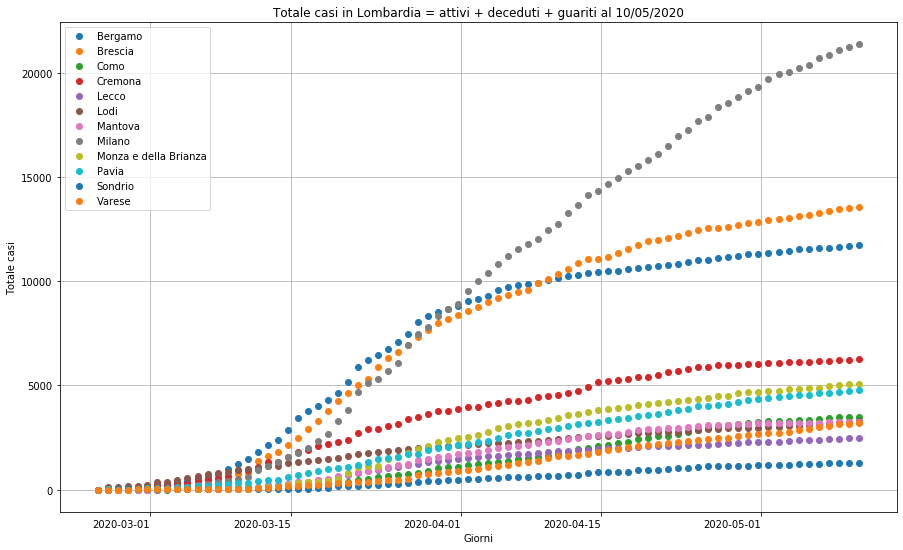

In [8]:
# create the figure for multiple subplot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylabel('Totale casi')
titolo='Totale casi in ' + regtarget  + ' = attivi + deceduti + guariti al ' + lastday
#loop to plot all the sub-dataset per provincia on the same graph 
for elem in provincie:
    df2=df[df.denominazione_provincia.str.contains(elem)] 
    df2.plot(lw=4, title=titolo, kind='line', rot='0',x='data', y='totale_casi', style='o', grid=True, ax=ax,figsize=(15,10),label=elem)
    plt.xlabel('Giorni')

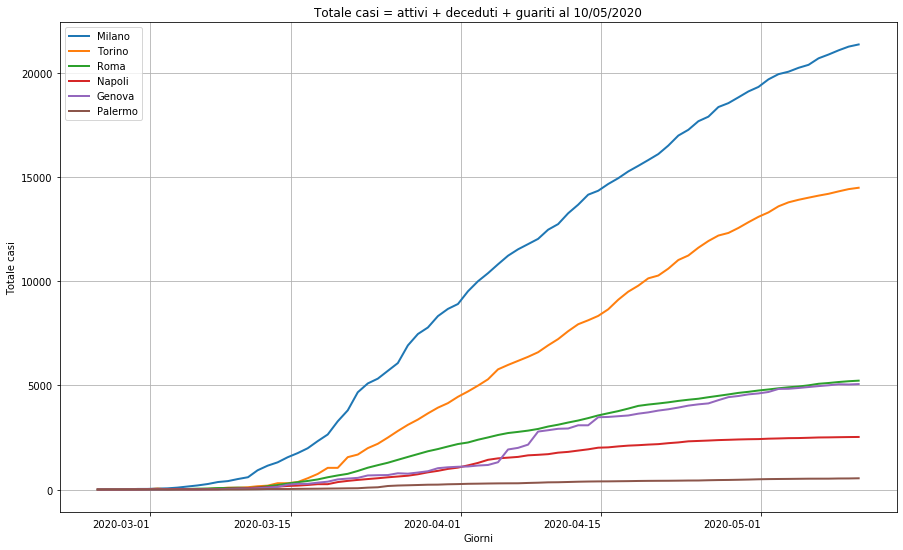

In [8]:
# create the figure for top 6  cities in Italy (inhabitants > 500.000) 
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylabel('Totale casi')
titolo='Totale casi = attivi + deceduti + guariti al '+ lastday
prov=('Milano', 'Torino',  'Roma', 'Napoli', 'Genova', 'Palermo' )
#loop to plot all the sub-dataset per provincia on the same graph 
for elem in prov:
    df3=df[df.denominazione_provincia.str.contains(elem)] 
    df3.plot(lw=2, title=titolo, kind='line', rot='0',x='data', y='totale_casi', grid=True, ax=ax,figsize=(15,10),label=elem)
    plt.xlabel('Giorni')